In [2]:
import os

from pyannote.core import Segment, Timeline, Annotation
from pyannote.metrics.diarization import DiarizationErrorRate
metric = DiarizationErrorRate()

In [5]:
def txt2annotation(path_txt, annotation=Annotation()):
    with open(path_txt, 'r') as f:
        for line in f:
            if len(line) == 0:
                continue
            start, end, speaker = line.split()
            annotation[Segment(float(start), float(end))] = speaker
        return annotation


# Primero, una prueba sencilla

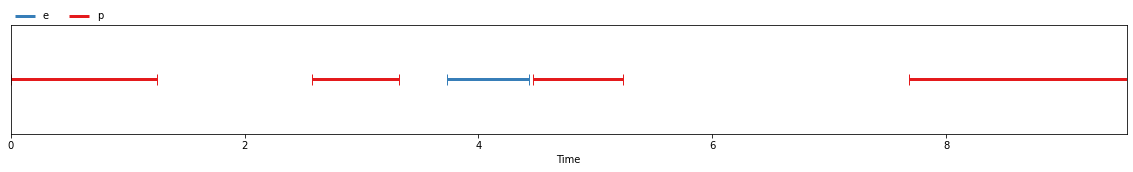

In [9]:
# reference annotation
reference_path = os.path.join('combined_database', 'reference', 'NP', 'CETRAM_AMG-0009_VocalSostenida.txt')
reference = txt2annotation(reference_path, annotation=Annotation(uri='test'))
reference

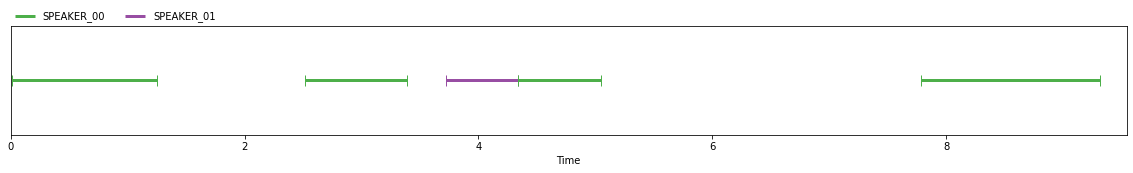

In [10]:
# hypothesis annotation
hypothesis_path = os.path.join('combined_database', 'hypothesis', 'NP', 'CETRAM_AMG-0009_VocalSostenida.txt')
hypothesis = txt2annotation(hypothesis_path, annotation=Annotation(uri='test'))
hypothesis

In [11]:
# DER
metric(reference, hypothesis, detailed=True)

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\pyannote\metrics\utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


{'total': 5.319330000000001,
 'missed detection': 0.5278220000000011,
 'correct': 4.696732,
 'false alarm': 0.1664920000000003,
 'confusion': 0.09477599999999953,
 'diarization error rate': 0.1483438703746526}

In [12]:
# full report and reset metric
report = metric.report(display=True)
metric.reset()

      diarization error rate total correct correct false alarm false alarm missed detection missed detection confusion confusion
                           %                     %                       %                                 %                   %
item                                                                                                                            
None                    0.00 10.28   10.28  100.00        0.00        0.00             0.00             0.00      0.00      0.00
test                   14.83  5.32    4.70   88.30        0.17        3.13             0.53             9.92      0.09      1.78
TOTAL                   5.06 15.60   14.97   96.01        0.17        1.07             0.53             3.38      0.09      0.61


# Ahora obtengamos un DER para todos los pares reference - hypothesis de la base combinada

In [13]:
# find all txt files in reference directory
reference_dir = os.path.join('combined_database', 'reference')
reference_files = [f for f in os.listdir(reference_dir) if f.endswith('.txt')]
# os walk to find all txt files in reference directory
count = 0
for root, dirs, files in os.walk(reference_dir):
    for file in files:
        if file.endswith('.txt'):
                reference_path = (os.path.join(root, file))
                annotation = Annotation(uri=file)
                reference = txt2annotation(reference_path, annotation)

                # find corresponding hypothesis file
                hypothesis_path = reference_path.replace('reference', 'hypothesis')
                annotation = Annotation(uri=file)
                hypothesis = txt2annotation(hypothesis_path, annotation)

                # compute DER
                metric(reference, hypothesis, detailed=True)

# cumulative report
print(abs(metric))
report = abs(metric.report(display=True))
report.to_csv('DER_report.csv')
metric.reset() # reset metric for next iteration

c:\Users\Usuario\AppData\Local\Programs\Python\Python310\lib\site-packages\pyannote\metrics\utils.py:200: UserWarning: 'uem' was approximated by the union of 'reference' and 'hypothesis' extents.
  warnings.warn(


0.3123337006752097
                                        diarization error rate   total correct correct false alarm false alarm missed detection missed detection confusion confusion
                                                             %                       %                       %                                 %                   %
item                                                                                                                                                                
CETRAM_AMG-0009_VocalSostenida.txt                       12.76    5.33    4.74   88.85        0.09        1.61             0.46             8.65      0.13      2.50
CETRAM_AMG-0028_NarracionDeHistoria.txt                  25.05   30.69   27.62   89.97        4.61       15.02             3.03             9.86      0.05      0.16
CETRAM_AMG-0031_RecuerdoAgradable.txt                    17.36   40.37   34.73   86.02        1.37        3.39             3.86             9.57      1.78  